# PREDICTION OF BANK'S MARKETING CAMPAIGN BINARY OUTCOME (NEGATIVE/POSITIVE)
### DATASET:
Obtained from Kaggle which is based on a publicly available dataset [Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology.<br>

### DATA TRANSFORMATION: 

1. Extract 'bank-full.csv' to training data and 'bank.csv' to test data
2. Encode categorical type data to numerical data
3. Reduce complexity by dropping redundant columns
4. Analyse and explore data's relationship and distribution 
5. Correct class-imbalanced data by oversampling and undersampling
6. Split data into training and validation models (80%: 20%)
7. Prepare test data by popping the labels<br>

### CLASSIFICATION MODELS: 
Compare and contrast the following models:
#### Tree
    * DecisionTree
    * AdaBoost
#### Ensemble
    * GradientBoosting Classifier
    * XGBooster
#### NaiveBayes
#### Discriminant Analysis
    * QuadraticDiscriminantAnalysis
### DATA EVALUATION METHODS:
Use score, precision, recall, f1 to evaluate the prediction models and confusion matrix for visualisation
<br>

In [336]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
from IPython.display import clear_output
from matplotlib import pyplot as plt
import math
import os
print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))


# Load dataset
dftrain = pd.read_csv('bank-full.csv', delimiter=";")
dftest = pd.read_csv('bank.csv', delimiter=";")



tf.random.set_seed(123)
print(dftrain.head())
print(dftest.head())
print(dftrain.tail())
print(dftest.tail())
print(dftrain.info())
print(dftest.info())
print(dftrain.describe())
print(dftest.describe())
#check for NAN
dftrain.isnull().values.any()
dftest.isnull().values.any()


TensorFlow version: 2.5.0-rc3
Eager execution: True
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
   age          job  marital  education default  balance ho

False

From the dataframe info above, all columns with "object" dtype contain categorical values, while the columns with "int64" dtype contain numerical values

In [337]:
categorical_features=['job','marital','education','default','housing','loan','contact','poutcome','y']

In [338]:
#To reduce the complexity of the data features, non-essential features are eliminated
#day and month of last contact are deleted because it is represented by pdays
dftrain.drop(['day','month','duration'],axis=1, inplace=True)
dftrain.shape
dftest.drop(['day','month','duration'],axis=1, inplace=True)
dftest.shape

(4521, 14)

0        2143
1          29
2           2
3        1506
4           1
         ... 
45206     825
45207    1729
45208    5715
45209     668
45210    2971
Name: balance, Length: 45211, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


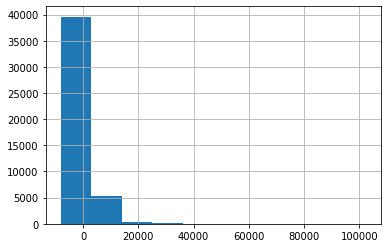

In [340]:
print(dftrain['balance'])
print(dftrain.balance.hist(bins=10))

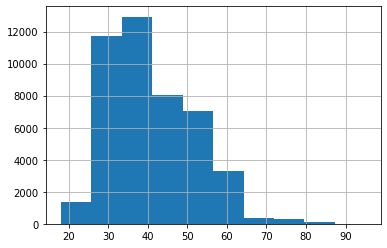

In [341]:
dftrain.age.hist(bins=10)
plt.show()


Majority from age 20-60, with secondary and/or tertiary education level

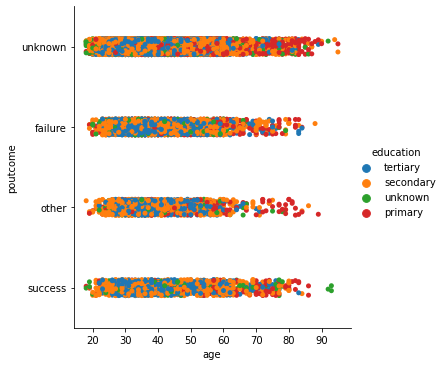

In [342]:
sns.catplot(x="age", y="poutcome",hue="education", data=dftrain)

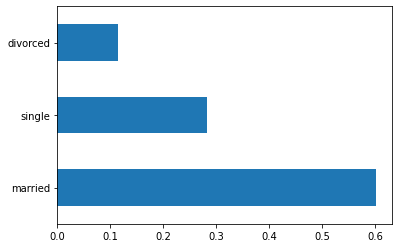

In [343]:
dftrain.marital.value_counts(normalize=True).plot(kind='barh')
plt.show()

Majority of the customers are married (60%), with only about 12% divorcees and 28% singles.
The jobs of the customers are widespread over 12 categories. The top 3 jobs of the customers are blue-collar workers(approx. 23%), followed by management personnels (approx.21%) and technician (approx. 17%).

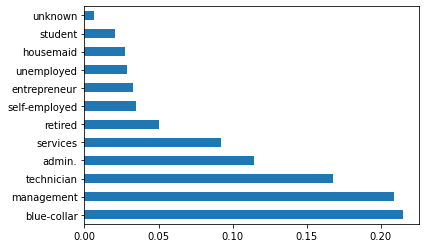

In [344]:
dftrain.job.value_counts(normalize=True).plot(kind='barh')
plt.show()

This dataset has imbalanced distribution of labels (8x more 'no's than 'yes's)

<AxesSubplot:>

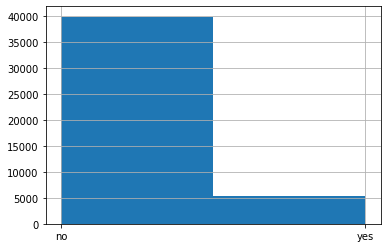

In [345]:
dftrain.y.hist(bins=2)


In [346]:
print(dftrain.max(axis=0), dftrain.min(axis=0))
print(dftrain.max(axis=1), dftrain.min(axis=1))

age               95
job          unknown
marital       single
education    unknown
default          yes
balance       102127
housing          yes
loan             yes
contact      unknown
campaign          63
pdays            871
previous         275
poutcome     unknown
y                yes
dtype: object age                18
job            admin.
marital      divorced
education     primary
default            no
balance         -8019
housing            no
loan               no
contact      cellular
campaign            1
pdays              -1
previous            0
poutcome      failure
y                  no
dtype: object
0        2143
1          44
2          33
3        1506
4          33
         ... 
45206     825
45207    1729
45208    5715
45209     668
45210    2971
Length: 45211, dtype: int64 0       -1
1       -1
2       -1
3       -1
4       -1
        ..
45206   -1
45207   -1
45208    3
45209   -1
45210    2
Length: 45211, dtype: int64


Label categorical classes: ['management', 'technician', 'entrepreneur', 'blue-collar', 'unknown', 'retired', 'admin.', 'services', 'self-employed', 'unemployed', 'housemaid', 'student']
Label numerical classes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
Label categorical classes: ['married', 'single', 'divorced']
Label numerical classes: [0, 1, 2]
Label categorical classes: ['tertiary', 'secondary', 'unknown', 'primary']
Label numerical classes: [0, 1, 2, 3]
Label categorical classes: ['no', 'yes']
Label numerical classes: [0, 1]
Label categorical classes: ['yes', 'no']
Label numerical classes: [0, 1]
Label categorical classes: ['no', 'yes']
Label numerical classes: [0, 1]
Label categorical classes: ['unknown', 'cellular', 'telephone']
Label numerical classes: [0, 1, 2]
Label categorical classes: ['unknown', 'failure', 'other', 'success']
Label numerical classes: [0, 1, 2, 3]
Label categorical classes: ['no', 'yes']
Label numerical classes: [0, 1]
       age  job  marital  education  defau

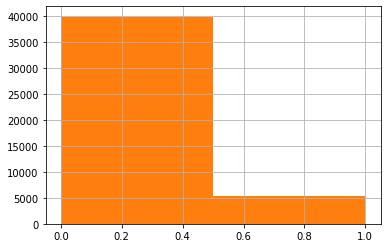

In [347]:

def encode(column_values):
    categories = column_values.unique().tolist()
    print(f"Label categorical classes: {categories}")
    c= column_values.map(categories.index)
    numerical_categories=[]
    for index, value in enumerate(categories):
        numerical_categories.append(index)
    print(f"Label numerical classes: {numerical_categories}")
    return c

def oversample(data):
    #replicate small class labels by 8 
    dfHolder=data['y']==1
    dfc=data[dfHolder]
    return data.append([dfc]*6, ignore_index=True)#<--6 chosen because 7 and 8 would result in more class'1' than '0'.
    #We want to close the gap, and not to overdo it
    

def undersample(data):
    #prune number of big class labels to match number of small class labels
    dfHolder=data['y']==0
    dfc=data[dfHolder]
    print('index',dfc.index)
    print('index[3]',dfc.index[2])
    diff=len(data)-len(dfc)
    print('diff',diff)#number of small class labels(1)
    for c in range(len(dfc)-diff):
        #print('removed index', dfc.index[c])
        data=data.drop(dfc.index[c], axis=0)
    return data

for i in categorical_features:
    dftrain[i]=encode(dftrain[str(i)])


#Preprocess to fit data into model
#Separate feature data to label, change categorical label ("yes" and "no") to numerical (1 and 0) 
featureSet = dftrain.copy()
#print("Before oversampling {} examples .".format(
#    len(featureSet)))
#featureSet = oversample(featureSet)
featureSet.head()
featureSet.tail()
#print("After oversampling {} examples.".format(
#    len(featureSet)))

#Split dataframes by chunking it into validate (0.2) and train data (0.8)
XTrain = featureSet.sample(frac=0.8,random_state=2021)

removeIndex = []
for a in XTrain.index:
    removeIndex.append(a)
featureSet.drop(labels=removeIndex,axis=0)
XValidate=featureSet

print(XTrain.head())
print(XValidate.head())

XTrain.reset_index()
XValidate.reset_index()
XTrain.y.hist(bins=2)
XValidate.y.hist(bins=2)

print("=====")
print(XTrain.head())
print(XValidate.head())

XTrainlabel = XTrain.pop('y')
XValidatelabel = XValidate.pop('y')
print("{} examples in training, {} examples for testing.".format(
    len(XTrain), len(XValidate)))

#convert dataframe into tensorflow dataset

trainDataset = tf.data.Dataset.from_tensor_slices((XTrain, XTrainlabel))
trainDataset = trainDataset.shuffle(buffer_size=len(XTrain))
validationDataset = tf.data.Dataset.from_tensor_slices((XValidate, XValidatelabel))
validationDataset = trainDataset.shuffle(buffer_size=len(XValidate))
for feat, targ in trainDataset.take(3):
    print ('Features: {}, Target: {}'.format(feat, targ))
    

In [348]:
#Create model using subclassing
#n_est before class balancing is 480
#max_depth:1,3,5
import math
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
!pip3 install xgboost
import xgboost as xgb
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

modelnames = ["Decision Tree","AdaBoost","Random Forest","Gradient Boosting Classifier","XGBooster","NaiveBayes","QDA","LDA","MLPClassifier"]
classification_model=[]

base_estimator=DecisionTreeClassifier(max_depth=5,criterion='gini', splitter='best', min_samples_split=2)
base_estimator.fit(XTrain,XTrainlabel)
acc = base_estimator.score(XValidate, XValidatelabel)
classification_model.append(base_estimator)
print("DTCAccuracy: {:.4f}".format(acc))
ada = AdaBoostClassifier(base_estimator=base_estimator,n_estimators=800)
ada.fit(XTrain, XTrainlabel)
acc = ada.score(XValidate, XValidatelabel)
classification_model.append(ada)
print("ADAAccuracy: {:.4f}".format(acc))
rf = RandomForestClassifier(max_depth=5, n_estimators=800, max_features=1)
rf.fit(XTrain,XTrainlabel)
acc=rf.score(XValidate,XValidatelabel)
print("RFAccuracy: {:.4f}".format(acc))
gbc = GradientBoostingClassifier(loss='deviance', learning_rate=0.001, n_estimators=800, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1)
gbc.fit(XTrain,XTrainlabel) #<-- chosen
acc = gbc.score(XValidate, XValidatelabel)
classification_model.append(gbc)
print("GBCAccuracy: {:.4f}".format(acc))
params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}
xgbooster = xgb.XGBClassifier(**params, use_label_encoder=False)
xgbooster.fit(XTrain, XTrainlabel)
acc = xgbooster.score(XValidate, XValidatelabel)
classification_model.append(xgbooster)
print("XGBAccuracy: {:.4f}".format(acc))
GNB = GaussianNB(var_smoothing=1e-12)
GNB.partial_fit(XTrain, XTrainlabel,np.unique(XTrainlabel))
acc = GNB.score(XValidate, XValidatelabel)
classification_model.append(GNB)
print("GNBAccuracy: {:.4f}".format(acc))
QDA = QuadraticDiscriminantAnalysis()
QDA.fit(XTrain, XTrainlabel)
acc = QDA.score(XValidate, XValidatelabel)
classification_model.append(QDA)
print("QDAAccuracy: {:.4f}".format(acc))
LDA = LinearDiscriminantAnalysis()
LDA.fit(XTrain, XTrainlabel)
acc = LDA.score(XValidate, XValidatelabel)
classification_model.append(LDA)
print("LDAAccuracy: {:.4f}".format(acc))
MLP = MLPClassifier(alpha=1e-5,max_iter=1000)
MLP.fit(XTrain, XTrainlabel)
acc = MLP.score(XValidate, XValidatelabel)
classification_model.append(MLP)
print("MLPAccuracy: {:.4f}".format(acc))




You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
DTCAccuracy: 0.8947
ADAAccuracy: 0.9707
RFAccuracy: 0.8830
GBCAccuracy: 0.8830
[19:35:17] WARNING: /private/var/folders/j5/p_dkw2yx53x4dkb7lthy99_00000gn/T/pip-install-rr_oaf7l/xgboost_5bfba1fa77894b86ba7580b3593ac83a/build/temp.macosx-10.13-x86_64-3.9/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBAccuracy: 0.8952
GNBAccuracy: 0.8191
QDAAccuracy: 0.8511
LDAAccuracy: 0.8873
MLPAccuracy: 0.8902


Label categorical classes: ['unemployed', 'services', 'management', 'blue-collar', 'self-employed', 'technician', 'entrepreneur', 'admin.', 'student', 'housemaid', 'retired', 'unknown']
Label numerical classes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
Label categorical classes: ['married', 'single', 'divorced']
Label numerical classes: [0, 1, 2]
Label categorical classes: ['primary', 'secondary', 'tertiary', 'unknown']
Label numerical classes: [0, 1, 2, 3]
Label categorical classes: ['no', 'yes']
Label numerical classes: [0, 1]
Label categorical classes: ['no', 'yes']
Label numerical classes: [0, 1]
Label categorical classes: ['no', 'yes']
Label numerical classes: [0, 1]
Label categorical classes: ['cellular', 'unknown', 'telephone']
Label numerical classes: [0, 1, 2]
Label categorical classes: ['unknown', 'failure', 'other', 'success']
Label numerical classes: [0, 1, 2, 3]
Label categorical classes: ['no', 'yes']
Label numerical classes: [0, 1]
   age  job  marital  education  default  

<ipython-input-350-85077a755f76>:66: RuntimeWarning: invalid value encountered in true_divide
  cfpercent = cf/np.sum(cf,axis=1,keepdims=True) *100
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter 

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      4000
           1       0.00      0.00      0.00       521

    accuracy                           0.88      4521
   macro avg       0.44      0.50      0.47      4521
weighted avg       0.78      0.88      0.83      4521

[[3990  501]
 [  10   20]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      4000
           1       0.67      0.04      0.07       521

    accuracy                           0.89      4521
   macro avg       0.78      0.52      0.51      4521
weighted avg       0.86      0.89      0.84      4521

[[3674  380]
 [ 326  141]]
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      4000
           1       0.30      0.27      0.29       521

    accuracy                           0.84      4521
   macro avg       0.60      0.59      0.60      4521
weighted avg       0

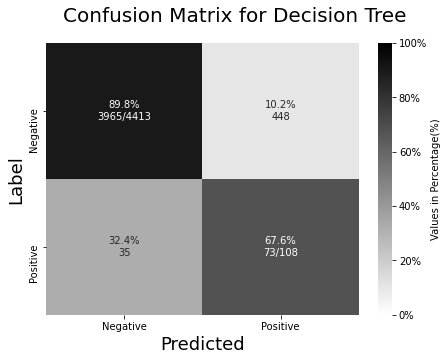

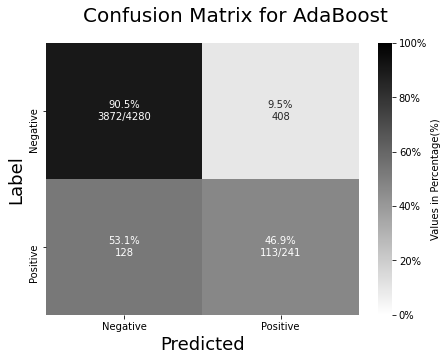

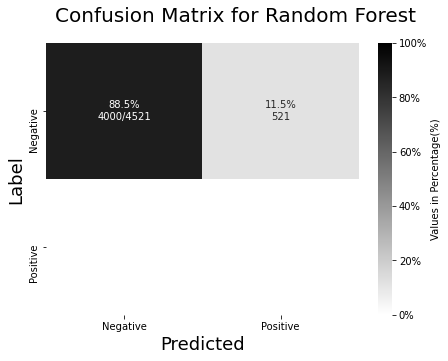

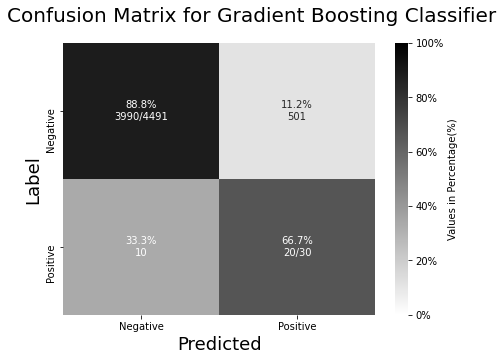

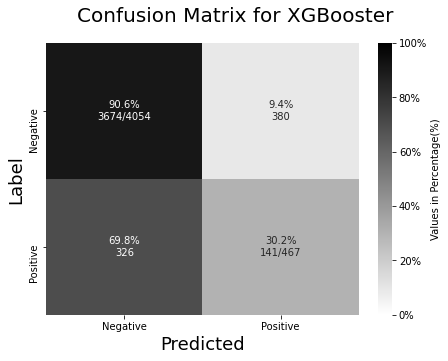

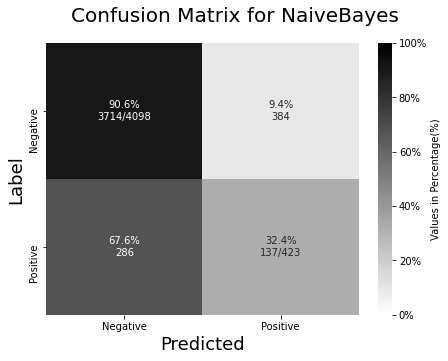

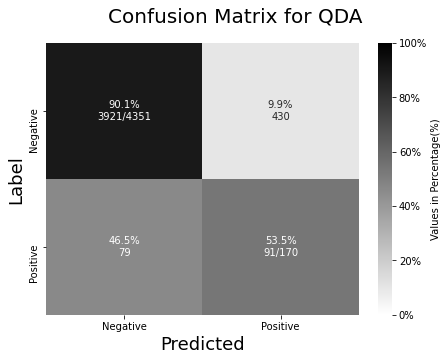

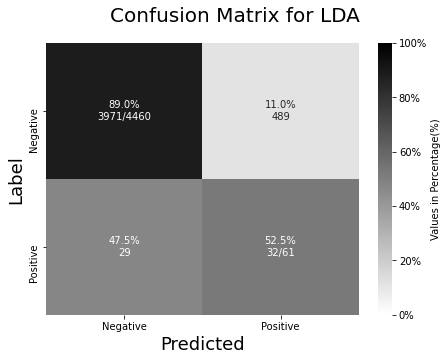

In [350]:
import seaborn as sns
from matplotlib.ticker import PercentFormatter
from sklearn.metrics import classification_report

def compute_cf(pred,predLabel):
    TP=0
    FP=0
    TN=0
    FN=0
    
    for i in range(len(pred)):
        
        if pred[i] == predLabel[i] == 1:
            TP+=1
        elif pred[i] == predLabel[i] == 0:
            TN+=1
        elif pred[i] != predLabel[i] and pred[i] ==1:
            FP+=1
        elif pred[i] != predLabel[i] and pred[i]==0:
            FN+=1
       
    return np.asarray([[TN,FP],[FN,TP]])

def create_annotation(nrows,ncols):
    annot = np.zeros((nrows,ncols)).astype(str)
    for i in range(nrows):
        for j in range(ncols):
            c = cf[i, j]
            p = cfpercent[i, j]
            if i == j:
                s = np.sum(cf,axis=1,keepdims=True)
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s[i])
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    return annot




#Using trained model to predict new data
for i in categorical_features:
    dftest[i]=encode(dftest[str(i)])

print(dftest.head())    
print(dftest.tail())

predictFeature = dftest.copy()
predictLabel = predictFeature.pop('y')

numone=0
numzero=0
for j in range(len(predictLabel)):
    if predictLabel[j] == 1:
        numone += 1
    elif predictLabel[j] == 0:
        numzero += 1
print("Number of Negative Labels: {}, Number of Positive Labels: {}".format(numzero, numone))


predictDataset = tf.data.Dataset.from_tensor_slices(predictFeature)

for k,v in zip(modelnames,classification_model):
    b = v.predict(predictFeature)
    cf = compute_cf(predictLabel,b)
    print(cf)
    cfpercent = cf/np.sum(cf,axis=1,keepdims=True) *100
    rows, cols=cf.shape
    annot= create_annotation(rows,cols)
    fig=plt.figure(figsize=(7,5))
    sns.heatmap(cfpercent, annot=annot, fmt='', linecolor='white', xticklabels=["Negative","Positive"], vmin=0,vmax=100,cbar=True, cbar_kws={'format':PercentFormatter(),'label': 'Values in Percentage(%)'}, yticklabels=["Negative","Positive"], cmap="binary")
    fig.suptitle('Confusion Matrix for {}'.format(k),  fontsize=20)
    plt.ylabel("Label",fontsize=18)
    plt.xlabel("Predicted",fontsize=18)
    # save the figure
    plt.savefig('Standard Plot'+k+'.png', dpi=300, bbox_inches='tight')
    print(classification_report(predictLabel,b))